In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lagrange's Method

# Line (n = 2)

# x = 0  2
# y = 7 11

x0 = 0
x1 = 2

y0 = 7
y1 = 11

x  = 1
l0 = ((x - x1) / (x0 - x1))
l1 = ((x - x0) / (x1 - x0))

y = y0*l0 + y1*l1

y

9.0

In [3]:
# Parabolic (n = 3)

# x = 0  2  3
# y = 7 11 28

xData = np.array([ 0., 2., 3.])
yData = np.array([ 7.,11.,28.])

n = 3
l = []

x = 1.
for i in range(0,n):
    a = 1.
    for j in range(0,n):
        if (i != j):
            a = a * (x - xData[j])/(xData[i] - xData[j])
    l.append(a)

y = 0
for i in range(0,n):
    y += yData[i]*l[i]

y

4.0

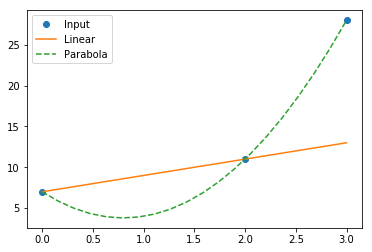

In [4]:
# Ploting graph

x = np.linspace(0,3,20)

# Linear
l0 = ((x - x1) / (x0 - x1))
l1 = ((x - x0) / (x1 - x0))

# Parabolic
l = []
for i in range(0,n):
    a = 1.
    for j in range(0,n):
        if (i != j):
            a = a * (x - xData[j])/(xData[i] - xData[j])
    l.append(a)

fit1 = y0*l0 + y1*l1
fit2 = 0
for i in range(0,n):
    fit2 += yData[i]*l[i]

plt.plot(xData,yData,'o',x,fit1,'-',x,fit2,'--')
plt.legend(['Input','Linear','Parabola'])
plt.show()

In [5]:
def lagrangePoly(x,xData,yDaya):
    n = len(xData)
    l = []
    for i in range(0,n):
        a = 1.
        for j in range(0,n):
            if (i != j):
                a = a * (x - xData[j])/(xData[i] - xData[j])
        l.append(a)
    
    p = 0
    for i in range(0,n):
        p += yData[i]*l[i]

    return p

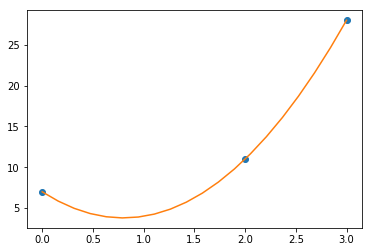

In [6]:
xData = np.array([ 0., 2., 3.])
yData = np.array([ 7.,11.,28.])
x = np.linspace(0,3,20)

plt.plot(xData,yData,'o',x,lagrangePoly(x,xData,yData),'-')
plt.show()

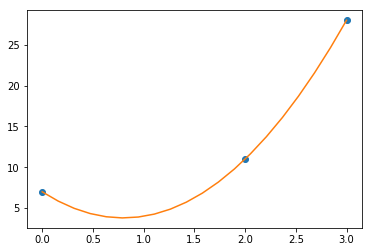

In [8]:
# Newton's Method

# x = 0  2  3
# y = 7 11 28

xData = np.array([ 0., 2., 3.])
yData = np.array([ 7.,11.,28.])

x = np.linspace(0,3,20)

n = len(xData)

dy = np.zeros((n,n))

dy[0] = yData

for i in range(1,n):
    for j in range(i,n):
        dy[i][j] = (dy[i-1][j] - dy[i-1][i-1])/(xData[j] - xData[i-1])

a = []
for i in range(0,n):
    a.append(dy[i][i])

p = a[n-1]
for i in range(1,n):
    p = a[(n-1)-i] + (x - xData[(n-1)-i])*p

plt.plot(xData,yData,'o',x,p,'-')
plt.show()

In [9]:
def newtonPoly(x,xData,yData):
    # Initiating
    n = len(xData)
    dy = np.zeros((n,n))  # dy is matrix of divided differences

    # Make divided differences
    dy[0] = yData
    for i in range(1,n):
        for j in range(i,n):
            dy[i][j] = (dy[i-1][j] - dy[i-1][i-1])/(xData[j] - xData[i-1])

    a = []
    for i in range(0,n):
        a.append(dy[i][i])

    p = a[n-1]
    for i in range(1,n):
        p = a[(n-1)-i] + (x - xData[(n-1)-i])*p
    
    return p

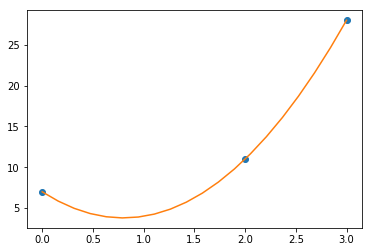

In [10]:
xData = np.array([ 0., 2., 3.])
yData = np.array([ 7.,11.,28.])
x = np.linspace(0,3,20)

plt.plot(xData,yData,'o',x,newtonPoly(x,xData,yData),'-')
plt.show()

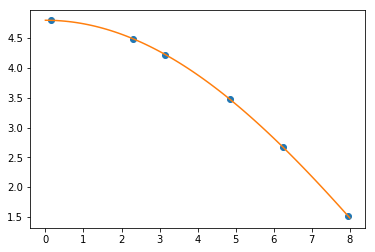

In [11]:
# x 0.15    2.30    3.15   4.85    6.25    7.95
# y 4.79867 4.49013 4.2243 3.47313 2.66674 1.51909

xData = np.array([0.15,2.30,3.15,4.85,6.25,7.95])
yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])
x = np.linspace(0,8,80)

plt.plot(xData,yData,'o',x,newtonPoly(x,xData,yData),'-')
plt.show()

In [45]:
import math

x = np.linspace(0,8,17)
y = 4.8*np.cos(np.pi*x/20)

xData = np.array([0.15,2.30,3.15,4.85,6.25,7.95])
yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])

error_ = newtonPoly(x,xData,yData)-y
error = math.sqrt(np.dot(error_,error_))

print('',y,'\n\n',newtonPoly(x,xData,yData),'\n\n',error_,'\n\nerror :',error)

 [4.8        4.7852032  4.74090403 4.66737562 4.56507128 4.43462176
 4.27683132 4.09267279 3.88328157 3.64994863 3.39411255 3.11735063
 2.82136921 2.50799311 2.1791544  1.83688048 1.48328157] 

 [4.80002509 4.78517849 4.74087697 4.6673607  4.56506686 4.43462106
 4.27682865 4.09266615 3.88327258 3.64994085 3.39410914 3.11735225
 2.82137301 2.50799358 2.17914691 1.83686805 1.48328554] 

 [ 2.50944796e-05 -2.47104204e-05 -2.70632809e-05 -1.49197831e-05
 -4.41509820e-06 -6.97032760e-07 -2.66536185e-06 -6.64132739e-06
 -8.99787160e-06 -7.78758468e-06 -3.41152443e-06  1.62202066e-06
  3.79414278e-06  4.67344762e-07 -7.49187110e-06 -1.24292195e-05
  3.96890594e-06] 

error : 5.160820292041476e-05


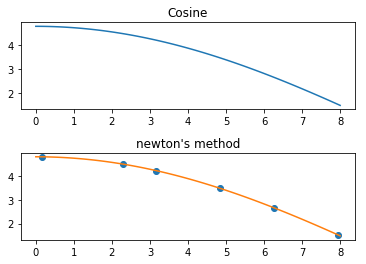

In [43]:
x = np.linspace(0,8,85)
y = 4.8*np.cos(np.pi*x/20)

xData = np.array([0.15,2.30,3.15,4.85,6.25,7.95])
yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])

plt.subplots_adjust(hspace = 0.5)

plt.subplot(2,1,1)
plt.title('Cosine')
plt.plot(x,y,'-')

plt.subplot(2,1,2)
plt.title('newton\'s method')
plt.plot(xData,yData,'o',x,newtonPoly(x,xData,yData),'-')
plt.show()